In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from torch.utils.data import DataLoader

from scaler import FeaturesScaler
from dataloader import HardMagni

In [2]:
TRAIN_SCENARIOS = ["Scenario_1", "Scenario_2", "Scenario_3", "Scenario_4", "Scenario_5"]
TEST_SCENARIO = "Scenario_1"

EXTRAS_PATH = "lhmp-thor-magni-challenge-extras" # path to data directory 
DATA_PATH = os.path.join(EXTRAS_PATH, "data") # path to data directory 
MAPS_PATH = os.path.join(DATA_PATH, "maps") # path to obstacle maps and offsets.json

In [3]:
train_scenarios = TRAIN_SCENARIOS
train_scenarios.remove(TEST_SCENARIO)
train_scenarios

['Scenario_2', 'Scenario_3', 'Scenario_4', 'Scenario_5']

In [4]:
DATA_CONFIG = {
    "obs_len" : 8,
    "pred_len" : 12}

# Loading data

In [5]:
train_tracklets = []
for train_scenario in train_scenarios:
    df = pd.read_csv(os.path.join(DATA_PATH, train_scenario + ".csv"), index_col = "Time")
    tracklets = [group for _, group in df.groupby("tracklet_id")]
    train_tracklets.extend(tracklets)

In [6]:
len(train_tracklets)

5958

In [7]:
full_ds_scl, statistics = FeaturesScaler.scale_dataset(train_tracklets)

In [8]:
train_ds = HardMagni(
    train_tracklets,
    visuals_path=MAPS_PATH,
    obs_len=DATA_CONFIG["obs_len"],
    window_size=3.5,
    collapse_visitors=False,
)

In [9]:
train_dl = DataLoader(train_ds, 4, shuffle=True)
train_dl_i = iter(train_dl)

In [10]:
sample = next(train_dl_i)

In [11]:
SAMPLE_IDX = 3

In [12]:
obstacle_map = sample["img"][SAMPLE_IDX].permute(1,2,0).numpy()
trajectory_pixels = sample["trajectories_pixels"][SAMPLE_IDX][:, :2]

In [13]:
tracklet_origin = trajectory_pixels[DATA_CONFIG["obs_len"] - 1]
traj_transformed = (
    trajectory_pixels[:7]
    - tracklet_origin
    + np.array([train_ds.window_size, train_ds.window_size])
)

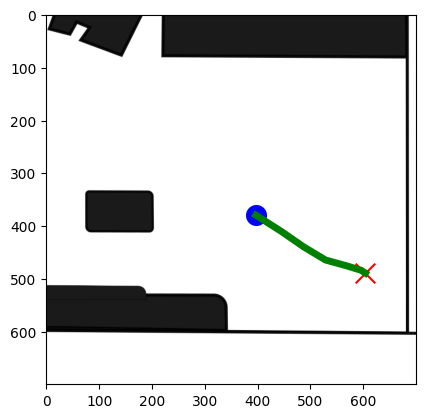

In [14]:
plt.imshow(obstacle_map);
plt.scatter(traj_transformed[0, 0], traj_transformed[0, 1], s=200, color="red", marker="x");
plt.scatter(traj_transformed[-1, 0], traj_transformed[-1, 1], s=200, color="blue");
plt.plot(traj_transformed[:, 0], traj_transformed[:, 1], linewidth=5, color="green");